In [1]:
#from  IPython.displayIPython  import display


#import libaires
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import cython
from ripser import ripser, plot_dgms
import wfdb
import math
import pandas as pd




In [2]:
#Function to make the libary
#theDimension - what dimesnion should the perisistnce diagram go to
#numOfSec - the number of seconds should be used in the diagram
#ID - ID of the timeseries
#Path- the full path to the timeseries 

def setWindow(aStep,aListOfVals):
    theIndex = 0
    theLength = len(aListOfVals)
    theFinList = []
    for i in range(0,theLength):
        if(theIndex <len(aListOfVals)):
            theFinList.append(aListOfVals[theIndex])
            theIndex += aStep
        
    return(theFinList)   

def makePersistDiagram(theDimension,numOfSec,ID,Path,Step):
    theX = []
    diagramss = ""
    x = ""
    theString = ""
    theFinData = []
    #get the timeseries to the number of seconds
    theSamp = wfdb.rdsamp(Path  + ID)
    theData = theSamp[0]
    for i in range(0,len(theSamp[0])):
    #print(theSamp[0][i][0])
        theX.append(theSamp[0][i][0])
    theData = theX[0:numOfSec]
   # print(theData)
    Delta = math.floor(Step/theDimension)
    theData = setWindow(Delta,theData)
   # print(theData)
    #theData = np.asarray(theData)
    #if even cuts :
    
    
    

        #setup set of vectors based off information given
    for i in range(0,len(theData)-theDimension):
        theFinData.append(theData[i:i+theDimension])
    theFinData = np.array(theFinData)
    print(theFinData.shape)
    print(theFinData)
    print("starting") 
        #use ripser and plot
    diagramss = ripser(theFinData,2)['dgms']
    plot_dgms(diagramss, show=True)
    x = open(ID + ".txt","w")
    theCSV = {'Dimension':[],"Birth":[],"Death":[]}
    
    for i in range(len(diagramss)):
        for j in range(len(diagramss[i])):
            theCSV["Dimension"].append(i)
            theCSV["Birth"].append(diagramss[i][j][0])
            theCSV["Death"].append(diagramss[i][j][1])
    theCSV = pd.DataFrame(theCSV)
    theCSV.to_csv(str(theDimension) +'.csv')
    return(diagramss)

#rint(type(makePersistDiagram(50,3200,"A07872",'/home/dr-dunstan/Downloads/training2017/')))


#function to save from csv
def makeDiaFromCSV(dataType):
    #vairbles to deal with the csv and opening it 
    lineSkip = 0
    theCSV = open("200_set_of_Norm_AF_Rand.csv")
    
    #working the normal column of the csv
    if(dataType == "Normal"):
        #for each line in the csv
        for line in theCSV:
            #remove whitespace
            line = line.strip()
            #split up based off commas
            a,b,c,d = line.split(",")
            #if not at first line
            if(lineSkip != 0):
                #create plot diagram with ID at that line
                theSamp = wfdb.rdsamp("/home/dr-dunstan/Downloads/training2017/" + b)
                theData = len(theSamp[0])
                makePersistDiagram(1,theData,b,'/home/dr-dunstan/Downloads/training2017/',5)
            lineSkip += 1
#same with af & random
    elif(dataType == "AF"):
        for line in theCSV:
            line = line.strip()
            a,b,c,d = line.split(",")
            if(lineSkip != 0):
                theSamp = wfdb.rdsamp("/home/dr-dunstan/Downloads/training2017/" + c)
                theData = len(theSamp[0])
                makePersistDiagram(1,theData,c,'/home/dr-dunstan/Downloads/training2017/',5)
            lineSkip += 1
    elif(dataType == "Random"):
        for line in theCSV:
            line = line.strip()
            a,b,c,d = line.split(",")
            if(lineSkip != 0):
                theSamp = wfdb.rdsamp("/home/dr-dunstan/Downloads/training2017/"+ d)
                theData = len(theSamp[0])
                makePersistDiagram(1,theData,d,'/home/dr-dunstan/Downloads/training2017/',5)
            lineSkip += 1
    else:
        print("Datatype dosent exsit")

#

In [ ]:


makeDiaFromCSV("Normal")
makeDiaFromCSV("AF")
makeDiaFromCSV("Random")

[[-0.127]
 [-0.162]
 [-0.197]
 ..., 
 [-0.018]
 [-0.022]
 [-0.021]]
(28, 2)
[[-0.127 -0.162]
 [-0.162 -0.197]
 [-0.197 -0.229]
 [-0.229 -0.245]
 [-0.245 -0.254]
 [-0.254 -0.261]
 [-0.261 -0.265]
 [-0.265 -0.268]
 [-0.268 -0.268]
 [-0.268 -0.267]
 [-0.267 -0.265]
 [-0.265 -0.263]
 [-0.263 -0.26 ]
 [-0.26  -0.256]
 [-0.256 -0.253]
 [-0.253 -0.249]
 [-0.249 -0.247]
 [-0.247 -0.245]
 [-0.245 -0.243]
 [-0.243 -0.241]
 [-0.241 -0.238]
 [-0.238 -0.236]
 [-0.236 -0.234]
 [-0.234 -0.232]
 [-0.232 -0.231]
 [-0.231 -0.23 ]
 [-0.23  -0.229]
 [-0.229 -0.229]]
starting


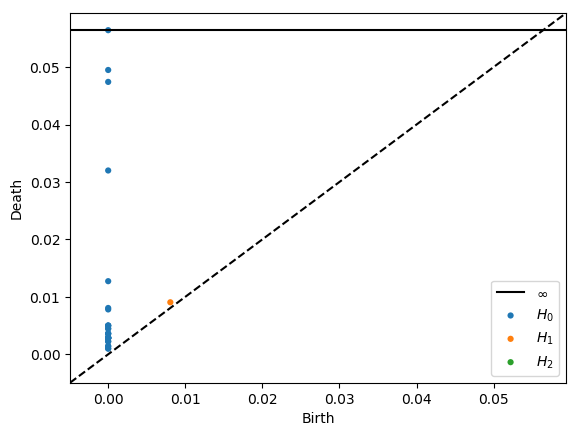

In [3]:

import timeit
start_time = timeit.default_timer()

theSamp = wfdb.rdsamp("/home/dr-dunstan/Downloads/training2017/"+ "A00001")
theData = len(theSamp[0])
print(theSamp[0])
makePersistDiagram(2,30,"A00001",'/home/dr-dunstan/Downloads/training2017/',2)
elapsed = timeit.default_timer() - start_time

In [ ]:
import timeit

theList = [55,60,65,70,75]
theFinalList = []
thePersistList = []
for element in  theList: 
    start_time = timeit.default_timer()

    theSamp = wfdb.rdsamp("/home/dr-dunstan/Downloads/training2017/"+ "A00001")
    #theData = len(theSamp[0])
    thePersist = makePersistDiagram(element,3000,"A00001",'/home/dr-dunstan/Downloads/training2017/',250)
    elapsed = timeit.default_timer() - start_time
    theFinalList.append(elapsed)
    thePersistList.append(thePersist)

(695, 55)
[[-0.127 -0.245 -0.268 ...,  0.049  0.021 -0.007]
 [-0.245 -0.268 -0.263 ...,  0.021 -0.007 -0.004]
 [-0.268 -0.263 -0.249 ..., -0.007 -0.004  0.007]
 ..., 
 [ 0.016  0.051  0.07  ..., -0.092 -0.078 -0.069]
 [ 0.051  0.07   0.082 ..., -0.078 -0.069 -0.061]
 [ 0.07   0.082  0.086 ..., -0.069 -0.061 -0.055]]
starting


[0.6470299840439111,
 0.6543979998677969,
 1.387157133081928,
 4.025382577907294,
 5.0782912380527705,
 11.042995186056942,
 14.668640203075483,
 23.651742126094177,
 43.12001567007974,
 41.756895924918354,
 85.70284675620496,
 85.45622263103724,
 241.41786997392774,
 222.33906099689193,
 217.41468082903884]

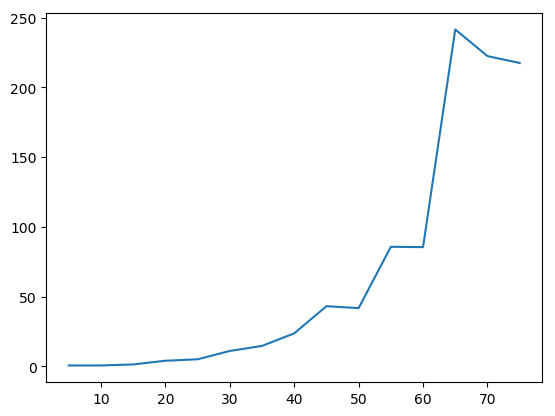

In [7]:
plt.plot(theList,theFinalList)
theFinalList